In [31]:
import os
import numpy as np
import cv2
import pandas as pd 

### Data extraction

In [ ]:
# os.listdir requires absolute path of the folder containing the subfolders of images

In [32]:
data_path = 'C:/Users/ADMIN/Desktop/luminar tech/Deep Learning/DL Project 3/archive/traffic_Data/DATA'

In [33]:
labels = os.listdir(data_path)

In [34]:
labels

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '6',
 '7',
 '8',
 '9']

In [35]:
data = []
target = []
img_size = 100

for label in labels:
    folder_path = os.path.join(data_path,label)
    image_names=os.listdir(folder_path)
    for image_name in image_names:
        image_path = os.path.join(folder_path,image_name)
        img = cv2.imread(image_path)
        try:
            imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            imgBlur = cv2.GaussianBlur(imgGray, (7,7),1)
            imgCanny = cv2.Canny(imgBlur, 2,2)
            contours,hierarchy = cv2.findContours(imgCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            flag=False
            for cnt in contours:
                area = cv2.contourArea(cnt)
                if area>500:                # to prevent area calculation of noise
                    flag==True
                    peri = cv2.arcLength(cnt, True)
                    approx = cv2.approxPolyDP(cnt, 0.02*peri, True)
                    x,y,w,h = cv2.boundingRect(approx)
                    imgCropped = imgGray[y:y+h,x:x+w]
                    imgResized = cv2.resize(imgCropped, (img_size,img_size))
                    data.append(imgResized)
                    target.append(int(label))
            if flag==False:
                data.append(cv2.resize(imgGray, (img_size,img_size)))
                target.append(int(label))
        except Exception as e:
            print('Exception:',e)

In [36]:
data = np.array(data)
data.shape

(8244, 100, 100)

### Reshaping the data 

In [37]:
data = np.expand_dims(data, axis=3)
data.shape

(8244, 100, 100, 1)

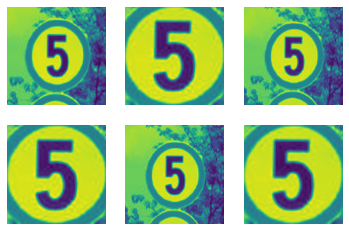

In [38]:
import matplotlib.pyplot as plt

count=1

for i in range(101,107):
    plt.subplot(2,3,count)
    count+=1
    plt.imshow(data[i])
    plt.axis('off')

### Scaling 

In [39]:
data = data/255.0

In [40]:
target = np.array(target)
target.shape

(8244,)

In [41]:
target[101:106]

array([0, 0, 0, 0, 0])

### Saving the data and target

In [42]:
np.save('data',data)
np.save('target',target)